In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
df = pd.read_csv("https://raw.githubusercontent.com/vivek2011383/EDA-Exercise/refs/heads/main/BIKE%20DETAILS.csv")

In [171]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [172]:
df.shape

(1061, 7)

In [173]:
df.dtypes

name                  object
selling_price          int64
year                   int64
seller_type           object
owner                 object
km_driven              int64
ex_showroom_price    float64
dtype: object

In [174]:
#1. What is the range of selling prices in the dataset?

print("Minimum Selling Price: ", df.selling_price.min())
print("Maxmum Selling Price: ", df.selling_price.max())
print(f"Range: ({df.selling_price.min()},{ df.selling_price.max()})")

Minimum Selling Price:  5000
Maxmum Selling Price:  760000
Range: (5000,760000)


In [175]:
#2. What is the median selling price for bikes in the dataset?

print("Median Selling Price: ", df.selling_price.median())

Median Selling Price:  45000.0


In [176]:
#3. What is the most common seller type?

print("Most common seller type: ", df.seller_type.mode()[0])

Most common seller type:  Individual


In [177]:
#4.  How many bikes have driven more than 50,000 kilometers?

print("Bikes that have driven more than 50000 kilometers: ", df[df.km_driven > 50000].shape[0])

Bikes that have driven more than 50000 kilometers:  170


In [178]:
#5. What is the average km_driven value for each ownership type?

df.groupby("owner")["km_driven"].mean()

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64

In [179]:
#6. What proportion of bikes are from the year 2015 or older?

x = len(df[df["year"] <=2015])/len(df)
print("Proportion of bikes from 2015 or older: ", round(x, 2))

Proportion of bikes from 2015 or older:  0.57


In [180]:
#7. What is the trend of missing values across the dataset?

df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [181]:
#Missing value treatment
df.ex_showroom_price.fillna(df.ex_showroom_price.mean(), inplace= True)

C:\Users\vk201\AppData\Local\Temp\ipykernel_8996\297325701.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.ex_showroom_price.fillna(df.ex_showroom_price.mean(), inplace= True)


In [182]:
#8. What is the highest ex_showroom_price recorded, and for which bike?

print("The highest ex_showroom_price recorded: ", df.ex_showroom_price.max())
print("Bike with highest ex_showroom_price: " ,df[df.ex_showroom_price == df.ex_showroom_price.max()].name.values[0])

The highest ex_showroom_price recorded:  1278000.0
Bike with highest ex_showroom_price:  Harley-Davidson Street Bob


In [183]:
#9. What is the total number of bikes listed by each seller type?

df["seller_type"].value_counts()

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

Correlation between selling_price and km_driven (First Owner bikes):  -0.24


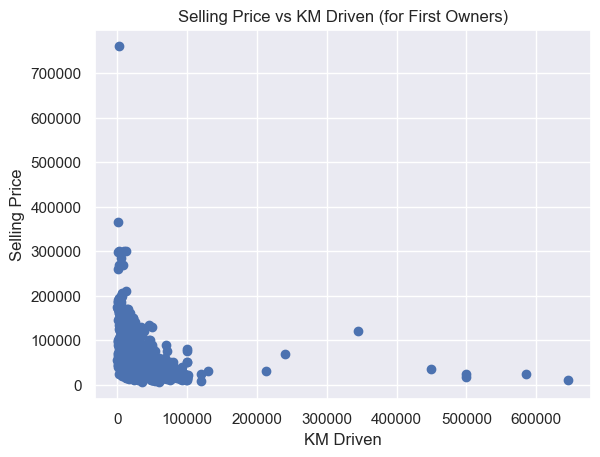

In [184]:
#10. What is the relationship between selling_price and km_driven for first-owner bikes?

first_owner_data = df[df["owner"] == "1st owner"]

correlation = first_owner_data["selling_price"].corr(first_owner_data["km_driven"])

print("Correlation between selling_price and km_driven (First Owner bikes): ", round(correlation, 2))

plt.scatter(first_owner_data["km_driven"], first_owner_data["selling_price"])
plt.title("Selling Price vs KM Driven (for First Owners)")
plt.xlabel("KM Driven")
plt.ylabel("Selling Price")
plt.grid(True)
plt.show()

In [185]:
#11. Identify and remove outliers in the km_driven column using the IQR method.

Q1 = df["km_driven"].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)

IQR = Q3 -Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"IQR: {IQR}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

filtered_km_df = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

print("\nData without outliers:")
filtered_km_df

IQR: 29500.0, Lower Bound: -30750.0, Upper Bound: 87250.0

Data without outliers:


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,87958.714058
1,Honda Dio,45000,2017,Individual,1st owner,5650,87958.714058
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.000000
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.000000
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,87958.714058
...,...,...,...,...,...,...,...
1054,Hero CBZ Xtreme,20000,2010,Individual,1st owner,50000,78700.000000
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.000000
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.000000
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.000000


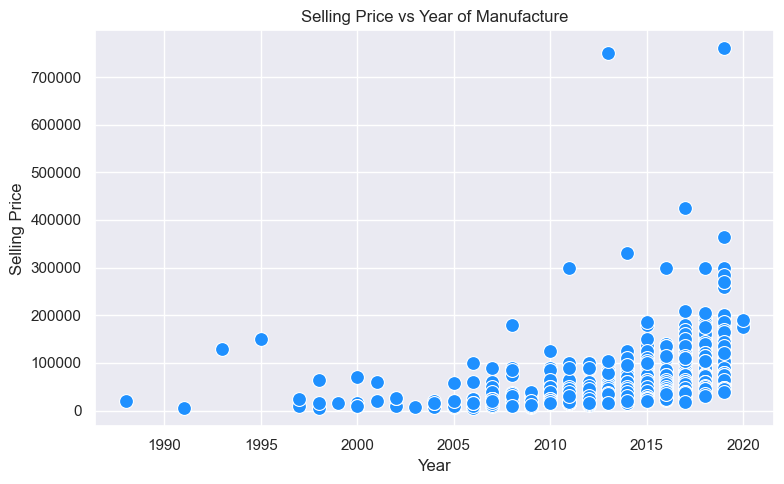

In [186]:
#12. Perform a bivariate analysis to visualize the relationship between year and selling_price.

sns.set_theme(style="darkgrid")
plt.figure(figsize=(8, 5))
sns.scatterplot(x='year', y='selling_price', data=df, s=100, color='dodgerblue')

plt.title('Selling Price vs Year of Manufacture')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.tight_layout()
plt.show()

In [187]:
df_copy = df.copy()

In [189]:
#13.What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?

#Age calculation
df_copy["bike_age"] = 2025 - df_copy["year"]

df_copy["depreciation"] = df_copy["ex_showroom_price"] - df_copy["selling_price"]


#Outliers in Selling price
Q1 = df_copy["depreciation"].quantile(0.25)
Q3 = df_copy["depreciation"].quantile(0.75)

IQR = Q3 -Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_copy = df_copy[(df_copy['depreciation'] >= lower_bound) & (df_copy['depreciation'] <= upper_bound)]


#depreciation_per_year
df_copy['depreciation_per_year'] = df_copy['depreciation'] / df_copy['bike_age']


#Average depreciation per year
average_depreciation = df_copy['depreciation_per_year'].mean()
print("Average Depreciation: ", average_depreciation.__round__(2))


Average Depreciation:  2696.34


In [190]:
#14. Which bike names are priced significantly above the average price for their manufacturing year?

avg_by_year = df.groupby('year')['selling_price'].mean().reset_index()
avg_by_year.rename(columns={"selling_price": "avg_price_for_year"}, inplace= True)


df = df.merge(avg_by_year, on='year')

In [191]:
#Identify bikes priced 20%+ above their year average
df['price_diff_percent'] = ((df['selling_price'] - df['avg_price_for_year']) / df['avg_price_for_year']) * 100
above_avg_bikes = df[df['price_diff_percent'] > 20]

print("Bikes priced significantly above average for their year:")
above_avg_bikes[['name', 'year', 'selling_price', 'avg_price_for_year', 'price_diff_percent']]

Bikes priced significantly above average for their year:


,name,year,selling_price,avg_price_for_year,price_diff_percent
0,Royal Enfield Classic 350,2019,175000,119689.511628,46.211642
2,Royal Enfield Classic Gunmetal Grey,2018,150000,87660.374046,71.114944
7,Royal Enfield Bullet 350 [2007-2011],2008,180000,34289.285714,424.945318
13,Yamaha YZF R3,2019,365000,119689.511628,204.955710
17,Yamaha YZF R15 S,2010,40000,31793.333333,25.812539
...,...,...,...,...,...
984,Royal Enfield Classic 500,2014,95000,48668.131868,95.199603
985,Royal Enfield Classic 500,2011,90000,35655.721311,152.413909
1005,TVS Apache RTR 160,2014,60000,48668.131868,23.283960
1008,Bajaj Pulsar 220 F,2012,52000,35748.400000,45.461056


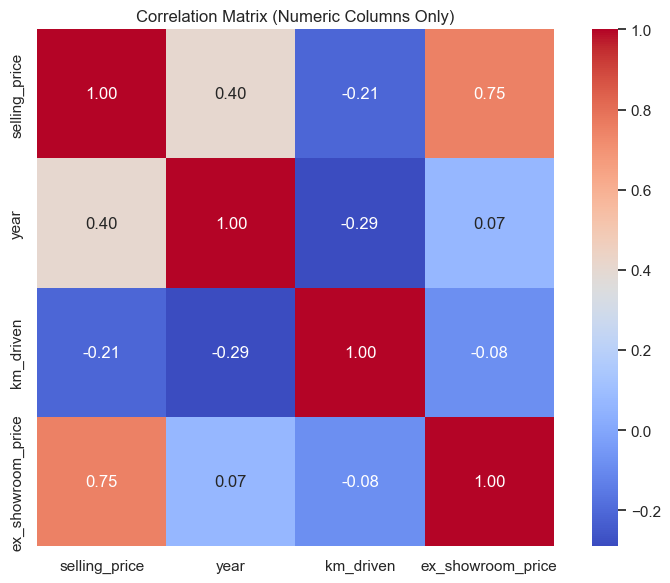

In [194]:
#15. Develop a correlation matrix for numeric columns and visualize it using a heatmap?

numeric_cols = ['selling_price', 'year', 'km_driven', 'ex_showroom_price']

corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix (Numeric Columns Only)")
plt.tight_layout()
plt.show()